逻辑回归：0 和 1

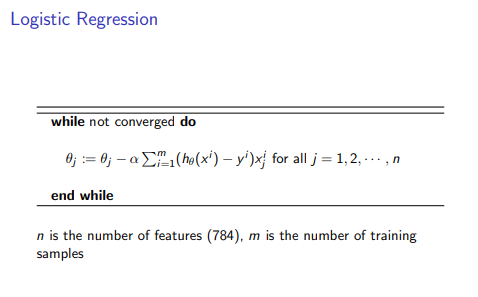

n ： 为特征数（784）
m ： 为训练的样本数
α:  常数（步长）

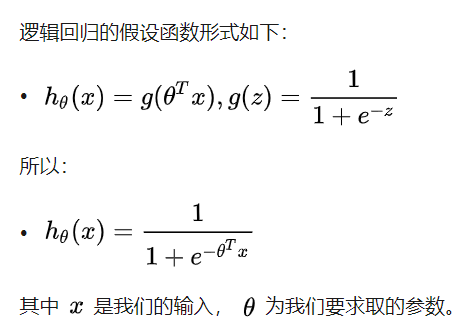

具体过程：
1. 选取假设函数hypothesis
2. 构造损失函数
3. 梯度下降法求最小值

利用Logistic函数（或称为Sigmoid函数）

sigmoid函数的两个实现

In [1]:
import numpy as np
import math
import time
images_x = np.ndfromtxt('./images.csv', delimiter=',')
labels_y = np.ndfromtxt("./labels.csv", delimiter=',', dtype=np.int8)
img_size = images_x.shape[1]
img_size

784

In [2]:
# 过滤 0和1 并分离数据
# 准备好测试数据和训练数据
# numpy整理
ind = np.logical_or(labels_y == 1, labels_y == 0)
images_x = images_x[ind, :]
labels_y = labels_y[ind]
num_train = int(len(labels_y) * 0.8)
x_train = images_x[0:num_train, :]
x_test = images_x[num_train:-1,:]
y_train = labels_y[0:num_train]
y_test = labels_y[num_train:-1]

In [3]:
# 不使用numpy函数的版本sigmoid函数:
def h1(theta, x):
    sum = 0.0
    for i in range(len(x)):
        sum -= theta[i] * x[i]
        return 1 / (1 + math.exp(sum))
    
# 使用numpy函数
def h2(theta, x):
    return 1 / (1 + np.exp(np.dot(theta, x)))

In [4]:
# 测试两个函数
theta = np.zeros([img_size])
x = images_x[0,:]
h1(theta, x)
h2(theta, x)
h1

<function __main__.h1(theta, x)>

In [5]:
# 一种方法：
def h(theta, x):
    return 1 / (1 + np.exp(-np.dot(theta, x)))

# 批量梯度下降得到最优
def gradient_descent1(theta, x_train, y_train, step):
    """
    theta: 当前的 θ 值
    x_train : 训练数据的特征值
    y_train : 训练的标签值
    step： 步长（常数）
    """
    # 初始化
    len_train = len(y_train)
    diff_arr = np.zeros([len_train])
    # 求每一个样本，假设预测的值 - 真实训练的值 
    for m in range(len_train):
        diff_arr[m] = h(theta, x_train[m, :]) - y_train[m]
        
    # 最开头的逻辑回归原理，公式套用
    for j in range(len(theta)):
        sum = 0.0
        for m in range(len_train):
            sum += diff_arr[m] * x_train[m, j]
        theta[j] = theta[j] - step * sum

# 训练得到最优
def train_elementwise(x_train, y_train, max_iter, step):
    theta = np.zeros([img_size])
    for i in range(max_iter):
        gradient_descent1(theta, x_train, y_train, step)       
    return theta

max_iter = 10
step = 0.01
start = time.time()
theta = train_elementwise(x_train, y_train, max_iter, step)
end = time.time()
print("花费时间：{0} 秒".format(end - start))

花费时间：5.577789306640625 秒


第二种改进方法：公式

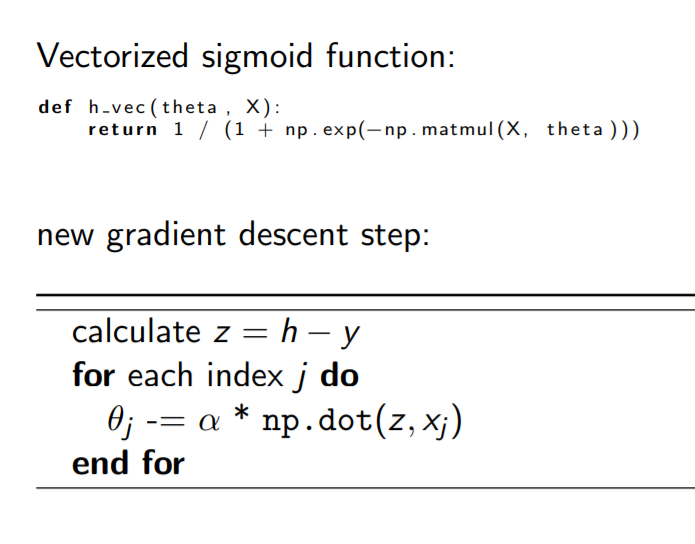

In [17]:
# 第二种方法：矩阵向量方式
def h_vec(theta, x):
    return 1 / (1 + np.exp(-np.matmul(x, theta)))

# 第二种改进方式梯度下降
def gradient_descent2(theta, x_train, y_train, step):
    """
    theta: 当前的 θ 值
    x_train : 训练数据的特征值
    y_train : 训练的标签值
    step： 步长（常数）
    """
    diff_z = h_vec(theta, x_train) - y_train
    for j in range(len(theta)):
        theta[j] = theta[j] - step * np.dot(diff_z, x_train[:, j])
        
# 训练
def train_battle(x_train, y_train, max_iter, step):
    """
    x_train : 训练数据的特征值
    y_train : 训练的标签值
    max_iter: 最大迭代
    step： 步长（常数）
    """
    theta = np.zeros([img_size])
    for i in range(max_iter):
        gradient_descent2(theta, x_train, y_train, step)       
    return theta

max_iter = 10
step = 0.01
start = time.time()
theta = train_battle(x_train, y_train, max_iter, step)
end = time.time()
print("花费时间：{0} 秒".format(end - start))
pred = (np.sign(h_vec(theta, x_test) - 0.5) + 1) / 2
print("percentage correct: {0}".format(np.sum(pred == y_test) / len(y_test)))
# 明显比上面的一种方法更快，更省时间。

花费时间：0.18089675903320312 秒
percentage correct: 1.0


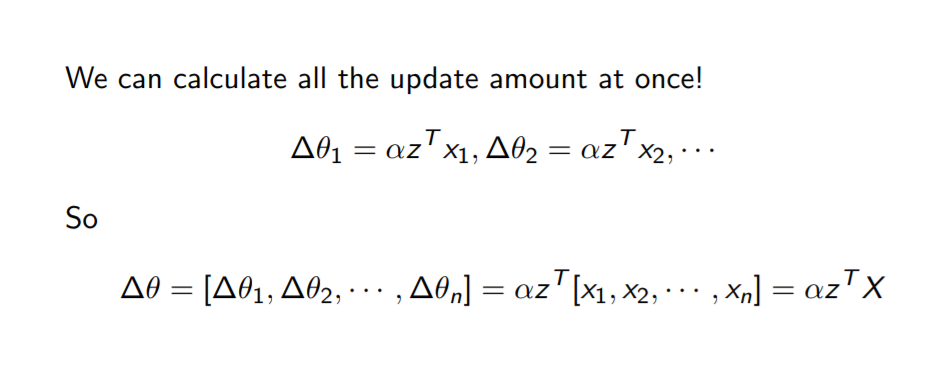
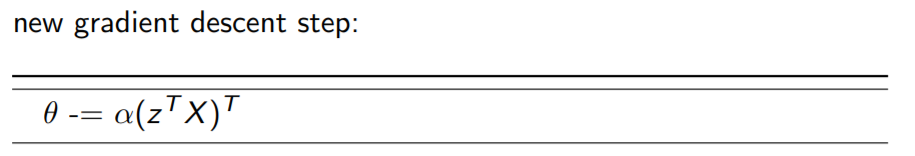

In [20]:
# 3方法：可以一次性计算所有的更新
def h_vec(theta, x):
    return 1 / (1 + np.exp(-np.matmul(x, theta)))

def GD(theta, x_train, y_train, step):
    z = h_vec(theta, x_train) - y_train
    theta -= step * np.squeeze(np.matmul(np.reshape(z, [1, -1]), x_train))
    
# 训练
def train_gd(x_train, y_train, max_iter, step):
    """
    x_train : 训练数据的特征值
    y_train : 训练的标签值
    max_iter: 最大迭代
    step： 步长（常数）
    """
    theta = np.zeros([img_size])
    for i in range(max_iter):
        GD(theta, x_train, y_train, step)       
    return theta

max_iter = 10
step = 0.01
start = time.time()
theta = train_gd(x_train, y_train, max_iter, step)
end = time.time()
print("花费时间：{0} 秒".format(end - start))
pred = (np.sign(h_vec(theta, x_test) - 0.5) + 1) / 2
print("percentage correct: {0}".format(np.sum(pred == y_test) / len(y_test)))
# 明显比前面的两种更好、更快，更省时间。

花费时间：0.03298306465148926 秒
percentage correct: 1.0
